# 数据爬取部分
## 数据的爬取分为如下几个步骤
* 利用urllib获取网页数据
* 利用bs4的beautifulSoup进行数据的解析和获取想要的数据
* 利用re正则表达式结合bs4得出想要的数据
* 利用sqlite3存储数据

In [1]:
# -*- coding: utf-8 -*-# 
#-------------------------------------------------------------------------------
# Name:         NBA
# Description:  
# Author:       zhouzikang
# Date:         2020-01-09
#-------------------------------------------------------------------------------
import sqlite3 #进行SQLit数据库的操作
from bs4 import BeautifulSoup  #网页解析，获取数据
import urllib.request, urllib.error #指定URL 获取网页数据
import re   #正则表达式-进行文字匹配

def main():
    baseurl = "http://www.stat-nba.com/award/item0.html"
    #1.爬取网页,解析数据
    datalist = getData(baseurl)
    #2.保存数据
    dbpath = "mvp.db"
    saveData2DB(datalist,dbpath)

#正则表达式
findPlayer = re.compile(r'[\s\S]+/player/[\s\S]+')

findYear = re.compile(r'current season change_color col0 row[\s\S]+')
findScore = re.compile(r'normal pts change_color col23 row[\s\S]+')
findAssist = re.compile(r'normal ast change_color col18 row[\s\S]+')
findRebound = re.compile(r'normal trb change_color col15 row[\s\S]+')

# 获取路径
def askURL(url):
    head = {  # 模拟浏览器头部信息，向豆瓣服务器发送消息
        "User-Agent": "Mozilla / 5.0(WindowsNT 10.0;WOW64) AppleWebKit / 537.36(KHTML, likeGecko) Chrome / 70.0.3538 .67Safari / 537.36"
    }
    # 用户代理表示告诉豆瓣服务器，我们是什么类型的机器
    request = urllib.request.Request(url,headers=head)
    html = ""
    try:
        response = urllib.request.urlopen(request)
        html = response.read().decode("utf-8")
        #print(html)
    except urllib.error.URLError as e:
        if hasattr(e,"code"):
            print(e.code)
        if hasattr(e,"reason"):
            print(e.reason)
    return html


#获取数据
def getData(baseurl):
    datalist = []
    players = []
    years = []
    scores = []
    assists = []
    rebounds = []
    html = askURL(baseurl)
    #逐一解析
    soup = BeautifulSoup(html, "html.parser")

    # 爬取MVP姓名
    for item in soup.find_all('a',href=findPlayer):
        item = str(item)
        item = re.sub('</a>'," ", item)
        item = re.sub('<a[\s\S]+>', " ", item)
        players.append(item.strip())

    # 爬取MVP年份
    for item in soup.find_all('td', class_=findYear):
        item = str(item)
        item = re.sub('</td>', " ", item)
        item = re.sub('<td[\s\S]+>', " ", item)
        years.append(item.strip())

    # 爬取MVP获得年份的得分
    for item in soup.find_all('td', class_=findScore):
        item = str(item)
        item = re.sub('</td>', " ", item)
        item = re.sub('<td[\s\S]+>', " ", item)
        scores.append(item.strip())

    # 爬取MVP获得年份的助攻
    for item in soup.find_all('td', class_=findAssist):
        item = str(item)
        item = re.sub('</td>', " ", item)
        item = re.sub('<td[\s\S]+>', " ", item)
        assists.append(item.strip())

    # 爬取MVP获得年份的篮板
    for item in soup.find_all('td', class_=findRebound):
        item = str(item)
        item = re.sub('</td>', " ", item)
        item = re.sub('<td[\s\S]+>', " ", item)
        rebounds.append(item.strip())
    #print(datalist)
    #把爬取的数据保存到列表中
    for i in range(len(players)):
        data = []
        data.append(years[i])
        data.append(players[i])
        data.append(scores[i])
        data.append(assists[i])
        data.append(rebounds[i])
        datalist.append(data)
    return datalist

def saveData2DB(datalist,dbpath):
    init_db(dbpath)
    conn = sqlite3.connect(dbpath)
    cur = conn.cursor()
    for data in datalist:
        for index in range(len(data)):
            if index >=2:
                continue
            data[index] = '"' + str(data[index]) + '"'
        sql = '''
                insert into nba (
                    year,name,score,assist,rebound)
                    values(%s)'''%",".join(data)

        cur.execute(sql)
        conn.commit()
    cur.close()
    conn.close()


def init_db(dbpath):
    sql = '''
        create table nba(
            year varchar ,
            name varchar ,
            score numeric ,
            assist numeric ,
            rebound numeric 
        )
    '''
    conn = sqlite3.connect(dbpath)
    cursor = conn.cursor()
    cursor.execute(sql)
    conn.commit()
    conn.close()


if __name__ == "__main__":
    #调用参数
    main()

# 数据可视化部分

## 把所有数据从数据库中取出来

In [2]:
import sqlite3
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams

def main():
    player = []
    year = []
    score = []
    assist = []
    rebound = []
    con = sqlite3.connect("mvp.db")
    cur = con.cursor()
    sql = '''select * from nba'''
    data = cur.execute(sql)
    # 将数据分离出来
    for item in data:
        year.append(item[0])
        player.append(item[1])
        score.append(item[2])
        assist.append(item[3])
        rebound.append(item[4])
    cur.close()
    con.close()
    #数组翻转
    year =year[::-1]
    player = player[::-1]
    score = score[::-1]
    assist = assist[::-1]
    rebound = rebound[::-1]

if __name__ == '__main__':
    main()

### NBA历年MVP得分变化趋势

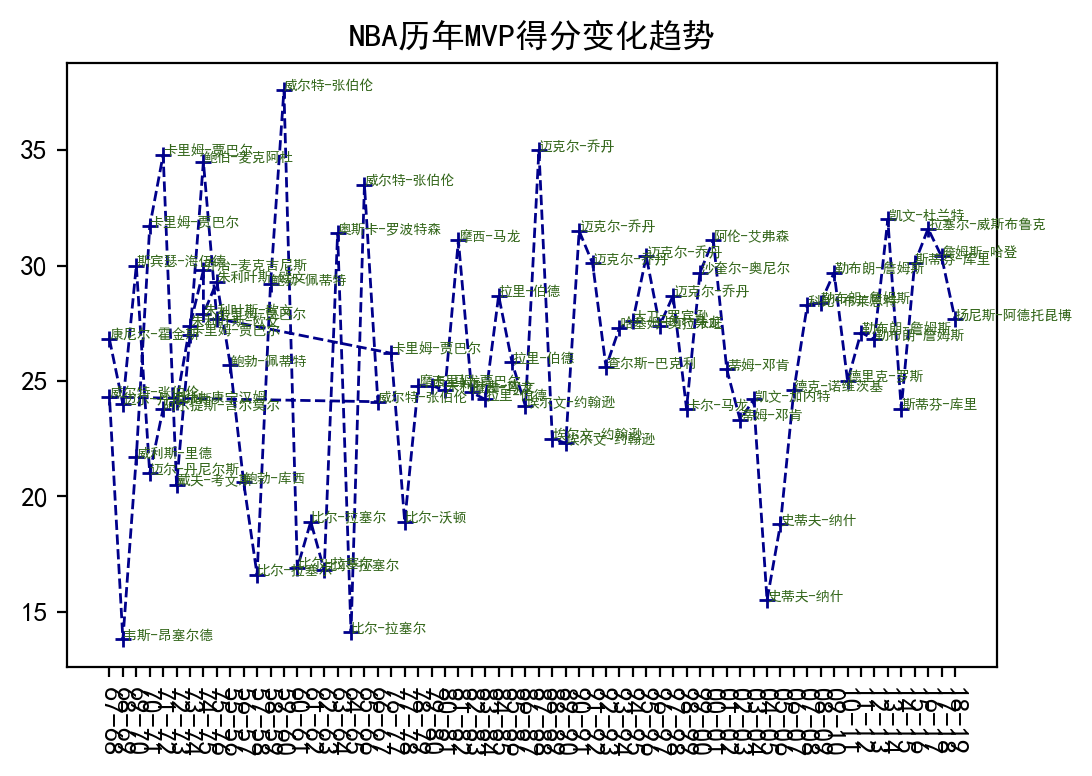

In [3]:
import sqlite3
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams

def main():
    player = []
    year = []
    score = []
    assist = []
    rebound = []
    con = sqlite3.connect("mvp.db")
    cur = con.cursor()
    sql = '''select * from nba'''
    data = cur.execute(sql)
    # 将数据分离出来
    for item in data:
        year.append(item[0])
        player.append(item[1])
        score.append(item[2])
        assist.append(item[3])
        rebound.append(item[4])
    cur.close()
    con.close()
    #数组翻转
    year =year[::-1]
    player = player[::-1]
    score = score[::-1]
    assist = assist[::-1]
    rebound = rebound[::-1]

    # 输出折线图
    plt.figure(dpi=200)  # figsize设置图片大小，dpi设置清晰度
    plt.plot(year,score,color="darkblue",linewidth=1,linestyle='--',marker='+')
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 这两行需要手动设置
    for i in range(len(player)):
        plt.text(year[i],score[i],player[i],fontsize=5,color=(0.2, 0.4, 0.1))
    plt.xticks(rotation=270)
    plt.title("NBA历年MVP得分变化趋势")
    plt.savefig("./temp2.png")
    plt.show()

   

if __name__ == '__main__':
    main() 

### NBA历年MVP得分条形图

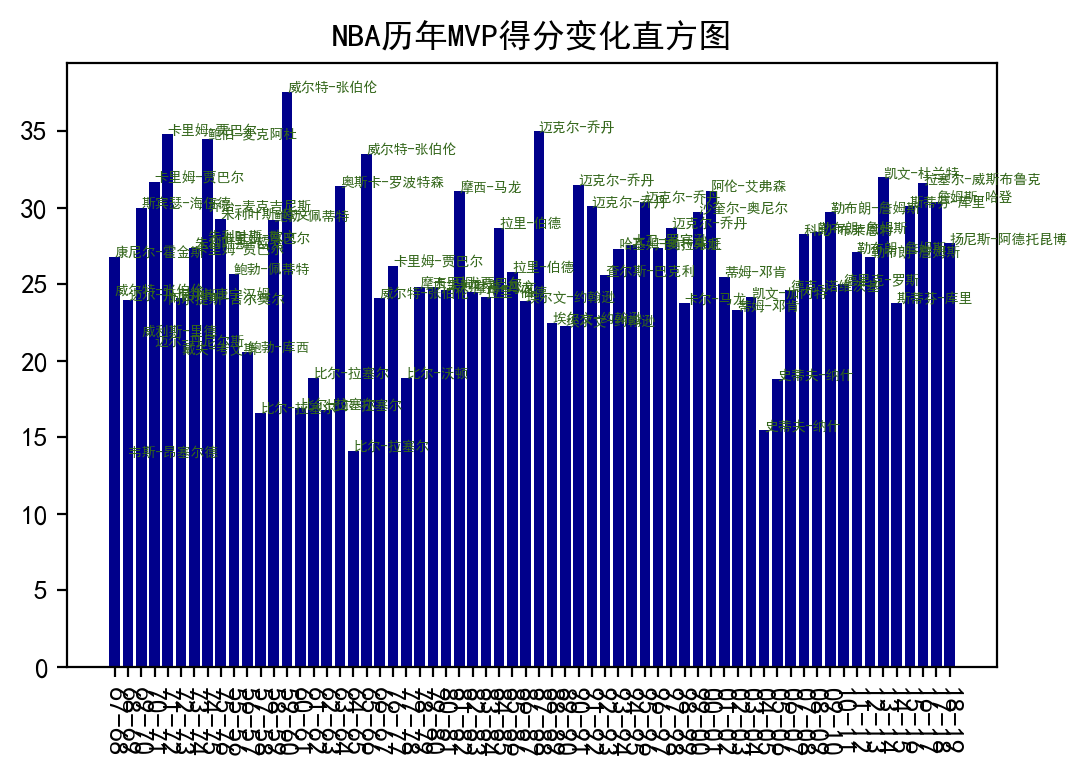

In [4]:
import sqlite3
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams

def main():
    player = []
    year = []
    score = []
    assist = []
    rebound = []
    con = sqlite3.connect("mvp.db")
    cur = con.cursor()
    sql = '''select * from nba'''
    data = cur.execute(sql)
    # 将数据分离出来
    for item in data:
        year.append(item[0])
        player.append(item[1])
        score.append(item[2])
        assist.append(item[3])
        rebound.append(item[4])
    cur.close()
    con.close()
    #数组翻转
    year =year[::-1]
    player = player[::-1]
    score = score[::-1]
    assist = assist[::-1]
    rebound = rebound[::-1]
    #输出直方图
    plt.figure(dpi=200)  # figsize设置图片大小，dpi设置清晰度
    plt.bar(year,score,color="darkblue")
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 这两行需要手动设置
    for i in range(len(player)):
        plt.text(year[i],score[i],player[i],fontsize=5,color=(0.2, 0.4, 0.1))
    plt.xticks(rotation=270)
    plt.title("NBA历年MVP得分变化直方图")
    plt.show()

if __name__ == '__main__':
    main()

### NBA历年MVP助攻变化趋势

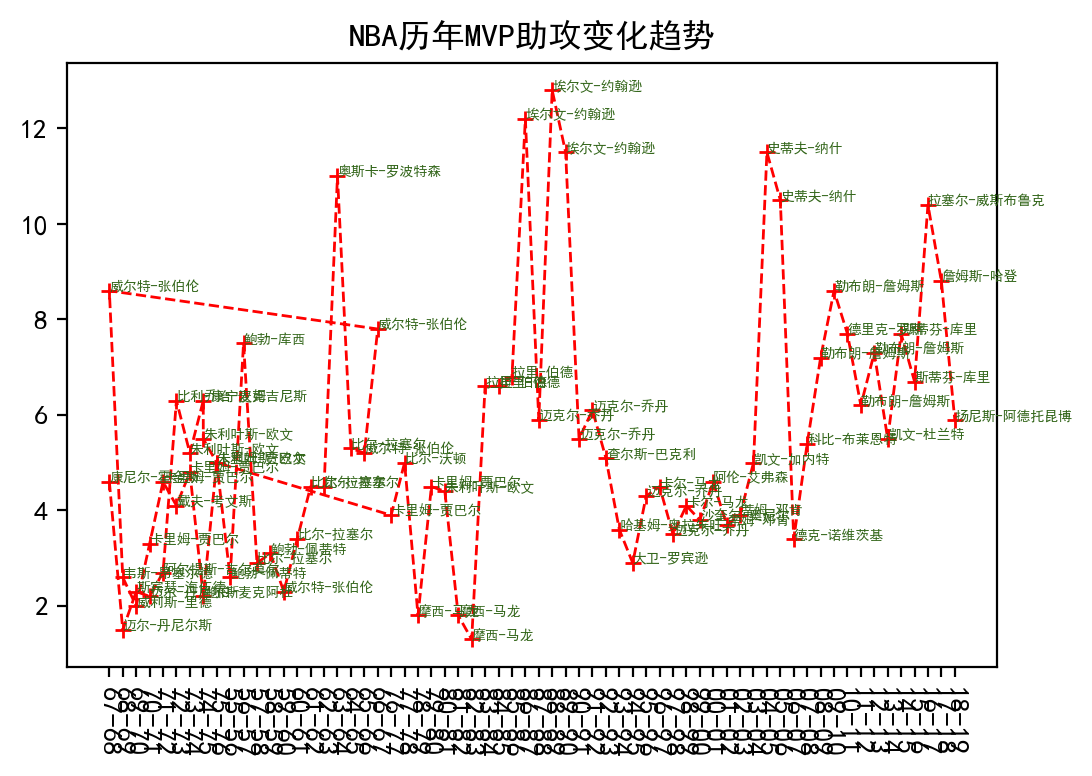

In [5]:
import sqlite3
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams

def main():
    player = []
    year = []
    score = []
    assist = []
    rebound = []
    con = sqlite3.connect("mvp.db")
    cur = con.cursor()
    sql = '''select * from nba'''
    data = cur.execute(sql)
    # 将数据分离出来
    for item in data:
        year.append(item[0])
        player.append(item[1])
        score.append(item[2])
        assist.append(item[3])
        rebound.append(item[4])
    cur.close()
    con.close()
    #数组翻转
    year =year[::-1]
    player = player[::-1]
    score = score[::-1]
    assist = assist[::-1]
    rebound = rebound[::-1]
    plt.figure(dpi=200)  # figsize设置图片大小，dpi设置清晰度
    plt.plot(year,assist,color="red",linewidth=1,linestyle='--',marker='+')
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 这两行需要手动设置
    for i in range(len(player)):
        plt.text(year[i],assist[i],player[i],fontsize=5,color=(0.2, 0.4, 0.1))
    plt.xticks(rotation=270)
    plt.title("NBA历年MVP助攻变化趋势")
    plt.show()

if __name__ == '__main__':
    main()

### NBA历年MVP助攻条形图

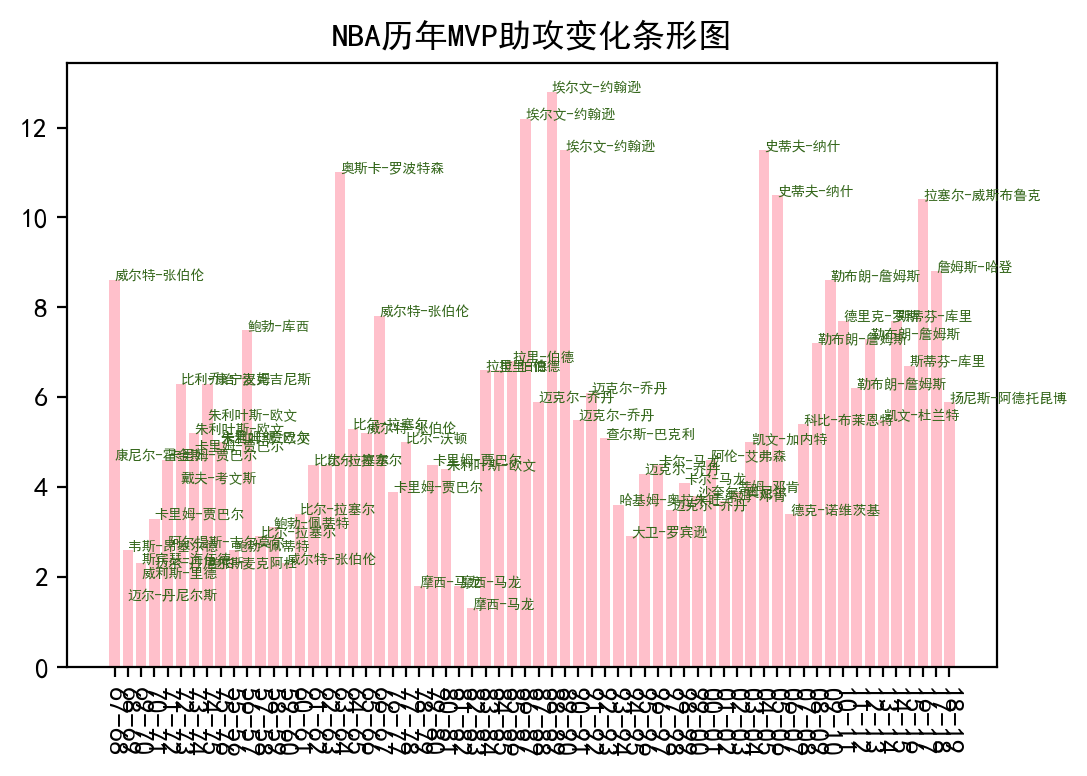

In [6]:
import sqlite3
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams

def main():
    player = []
    year = []
    score = []
    assist = []
    rebound = []
    con = sqlite3.connect("mvp.db")
    cur = con.cursor()
    sql = '''select * from nba'''
    data = cur.execute(sql)
    # 将数据分离出来
    for item in data:
        year.append(item[0])
        player.append(item[1])
        score.append(item[2])
        assist.append(item[3])
        rebound.append(item[4])
    cur.close()
    con.close()
    #数组翻转
    year =year[::-1]
    player = player[::-1]
    score = score[::-1]
    assist = assist[::-1]
    rebound = rebound[::-1]
    plt.figure(dpi=200)  # figsize设置图片大小，dpi设置清晰度
    plt.bar(year,assist,color="pink")
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 这两行需要手动设置
    for i in range(len(player)):
        plt.text(year[i],assist[i],player[i],fontsize=5,color=(0.2, 0.4, 0.1))
    plt.xticks(rotation=270)
    plt.title("NBA历年MVP助攻变化条形图")
    plt.show()

if __name__ == '__main__':
    main()

### NBA历年MVP篮板变化趋势

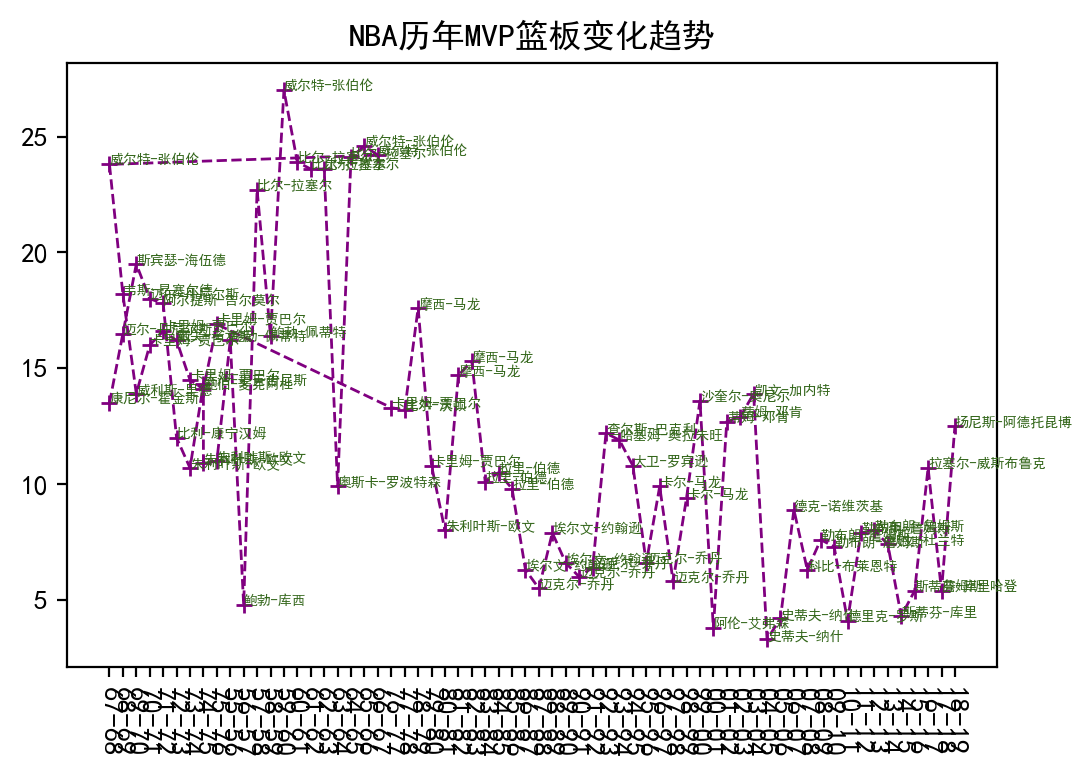

In [7]:
import sqlite3
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams

def main():
    player = []
    year = []
    score = []
    assist = []
    rebound = []
    con = sqlite3.connect("mvp.db")
    cur = con.cursor()
    sql = '''select * from nba'''
    data = cur.execute(sql)
    # 将数据分离出来
    for item in data:
        year.append(item[0])
        player.append(item[1])
        score.append(item[2])
        assist.append(item[3])
        rebound.append(item[4])
    cur.close()
    con.close()
    #数组翻转
    year =year[::-1]
    player = player[::-1]
    score = score[::-1]
    assist = assist[::-1]
    rebound = rebound[::-1]
    # 输出折线图
    plt.figure(dpi=200)  # figsize设置图片大小，dpi设置清晰度
    plt.plot(year,rebound,color="purple",linewidth=1,linestyle='--',marker='+')
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 这两行需要手动设置
    for i in range(len(player)):
        plt.text(year[i],rebound[i],player[i],fontsize=5,color=(0.2, 0.4, 0.1))
    plt.xticks(rotation=270)
    plt.title("NBA历年MVP篮板变化趋势")
    plt.show()

if __name__ == '__main__':
    main()

### NBA历年MVP篮板条形图

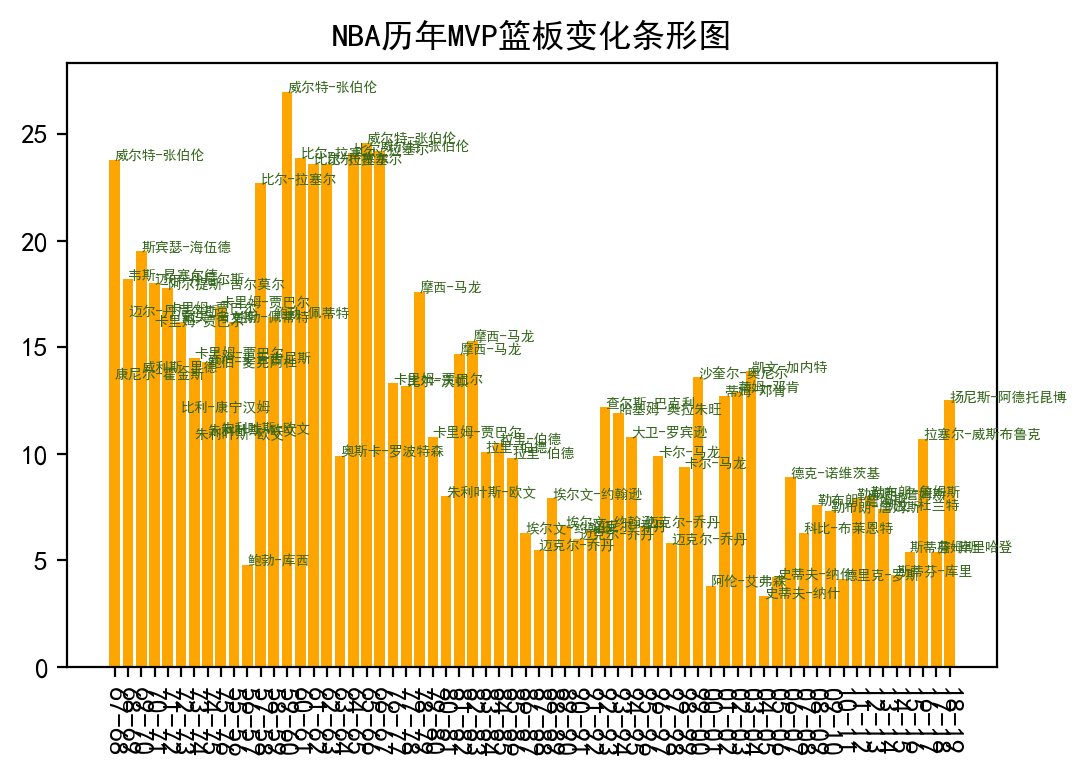

In [8]:
import sqlite3
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams

def main():
    player = []
    year = []
    score = []
    assist = []
    rebound = []
    con = sqlite3.connect("mvp.db")
    cur = con.cursor()
    sql = '''select * from nba'''
    data = cur.execute(sql)
    # 将数据分离出来
    for item in data:
        year.append(item[0])
        player.append(item[1])
        score.append(item[2])
        assist.append(item[3])
        rebound.append(item[4])
    cur.close()
    con.close()
    #数组翻转
    year =year[::-1]
    player = player[::-1]
    score = score[::-1]
    assist = assist[::-1]
    rebound = rebound[::-1]
    plt.figure(dpi=200)  # figsize设置图片大小，dpi设置清晰度
    plt.bar(year,rebound,color="orange")
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 这两行需要手动设置
    for i in range(len(player)):
        plt.text(year[i],rebound[i],player[i],fontsize=5,color=(0.2, 0.4, 0.1))
    plt.xticks(rotation=270)
    plt.title("NBA历年MVP篮板变化条形图")
    plt.show()

if __name__ == '__main__':
    main()